<a href="https://colab.research.google.com/github/MGSSVENKATESH/AI-APSCHE/blob/main/EmployeeBurnOut_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [4]:
pd.set_option('display.max_columns',None)
burnoutDf = pd.read_csv('/content/drive/MyDrive/employee_burnout_analysis.csv')
burnoutDf

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [5]:
#Convert into datetime dataType
burnoutDf['Date of Joining'] = pd.to_datetime(burnoutDf['Date of Joining'])

In [6]:
#give the number of rows and columns
burnoutDf.shape

(22750, 9)

In [7]:
#general information
burnoutDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [8]:
#show top 5 rows
burnoutDf.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [9]:
#extract all columns of the dataset
burnoutDf.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [10]:
#check for null values
burnoutDf.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [11]:
#check the duplicate values
burnoutDf.duplicated().sum()

0

In [12]:
#calculate the mean,std,min,max and count of every attribute
burnoutDf.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [13]:
#show the unique values
for i,col in enumerate(burnoutDf.columns):
  print(f"\n\n{burnoutDf[col].unique()}")
  print(f"\n\n{burnoutDf[col].value_counts()}")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']


fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64


['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-0

In [14]:
#Drop irrelevant column
burnoutDf=burnoutDf.drop(['Employee ID'],axis=1)

In [15]:
#check the columns of the attributes
intFloatburnoutDf = burnoutDf.select_dtypes([np.int,np.float])
for i,col in enumerate(intFloatburnoutDf.columns):
  if(intFloatburnoutDf[col].skew() >= 0.1):
    print("\n",col,"feature is Positively Skewed and value is: ",intFloatburnoutDf[col].skew())
  elif(intFloatburnoutDf[col].skew() <= 0.1):
    print("\n",col,"feature is Negatively Skewed and value is: ",intFloatburnoutDf[col].skew())
  else:
    print("\n",col,"feature is Normally Skewed and value is: ",intFloatburnoutDf[col].skew())


 Designation feature is Negatively Skewed and value is:  0.09242138478903683

 Resource Allocation feature is Positively Skewed and value is:  0.20457273454318103

 Mental Fatigue Score feature is Negatively Skewed and value is:  -0.4308950578815428

 Burn Rate feature is Negatively Skewed and value is:  0.045737370909640515


In [16]:
#Replace the null values with median
burnoutDf['Resource Allocation'].fillna(burnoutDf['Resource Allocation'].median(),inplace=True)
burnoutDf['Mental Fatigue Score'].fillna(burnoutDf['Mental Fatigue Score'].median(),inplace=True)
burnoutDf['Burn Rate'].fillna(burnoutDf['Burn Rate'].median(),inplace=True)

In [17]:
#check for null values
burnoutDf.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [18]:
burnoutDf.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.850656,0.656316,0.719283
Resource Allocation,0.850656,1.000000,0.737823,0.809938
Mental Fatigue Score,0.656316,0.737823,1.000000,0.877903
Burn Rate,0.719283,0.809938,0.877903,1.000000


# Data Visualization

In [19]:
#Plotting Heat map to check correlation
Corr = burnoutDf.corr()
sns.set(rc={'figure.figsize':(14,12)})
fig = px.imshow(Corr,text_auto=True,aspect="auto")
fig.show()

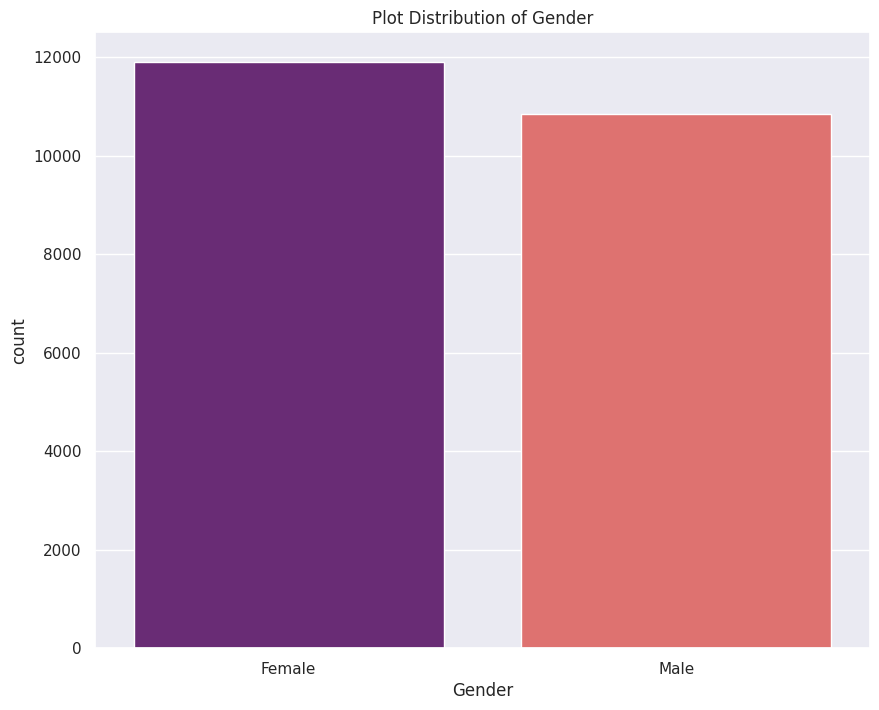

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender",data = burnoutDf,palette="magma")
plt.title("Plot Distribution of Gender")
plt.show()

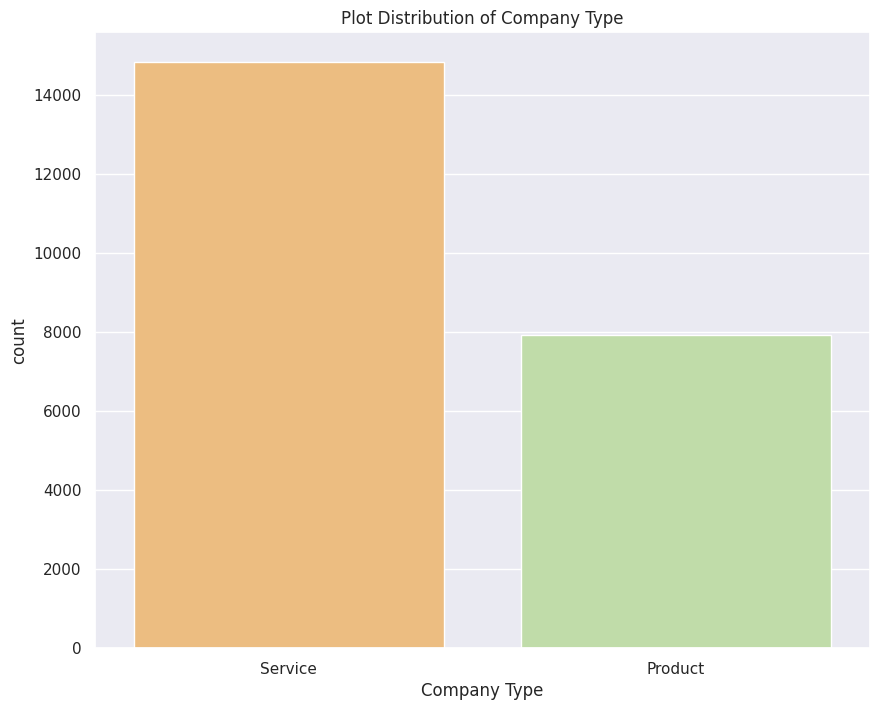

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x="Company Type",data = burnoutDf,palette="Spectral")
plt.title("Plot Distribution of Company Type")
plt.show()

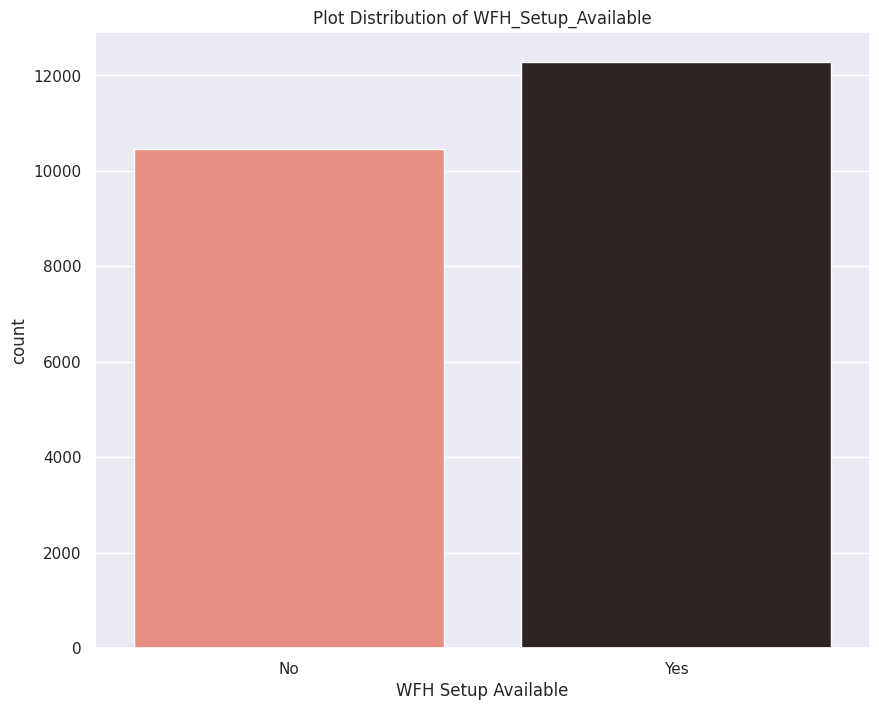

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x="WFH Setup Available",data = burnoutDf,palette="dark:salmon_r")
plt.title("Plot Distribution of WFH_Setup_Available")
plt.show()

In [23]:
#Count-Plot Distribution of attributes with the help of Histogram
burn_st = burnoutDf.loc[:,'Date of Joining':'Burn Rate']
burn_st = burnoutDf.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="Plot Distribution of "+col,color_discrete_sequence=['indianred'])
  fig.update_layout(bargap=0.2)
  fig.show()


In [24]:
# Plot distribution of Burn rate on the basis of Designation
fig = px.line(burnoutDf,y="Burn Rate",color="Designation",title="Burn rate on the basis of Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()

In [25]:
# Plot distribution of Burn rate on the basis of Gender
fig = px.line(burnoutDf,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [26]:
# Plot distribution of mental fatigue on the basis of Designation
fig = px.line(burnoutDf,y="Mental Fatigue Score",color="Designation",title="Mental fatigue vs Designation",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

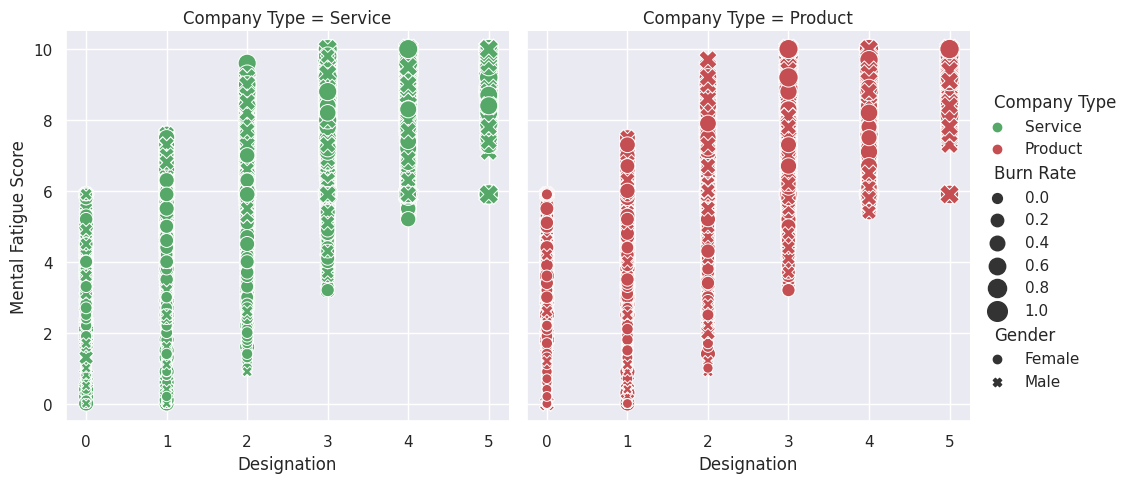

In [27]:
# Plot Distribution of "Designation vs mental fatigue" as per Company type, Burn rate and Gender
sns.relplot(
    data=burnoutDf,x="Designation",y="Mental Fatigue Score",col="Company Type",
    hue="Company Type",size="Burn Rate",style="Gender",
    palette=["g","r"], sizes=(50,200)
)

# Label Encoding

In [28]:
# label encoding and assign a new variable
from sklearn import preprocessing
Label_encode=preprocessing.LabelEncoder()

In [29]:
# Assign in new variable
burnoutDf['GenderLabel'] = Label_encode.fit_transform(burnoutDf['Gender'].values)
burnoutDf['Company_TypeLabel'] = Label_encode.fit_transform(burnoutDf['Company Type'].values)
burnoutDf['WFH_Setup_Available'] = Label_encode.fit_transform(burnoutDf['WFH Setup Available'].values)

In [30]:
#check assigned values
gn=burnoutDf.groupby('Gender')
gn=gn['GenderLabel']
gn.first()

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64

In [31]:
#check assigned values
ct=burnoutDf.groupby('Company Type')
ct=ct['Company_TypeLabel']
ct.first()

Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64

In [32]:
#check assigned values
wsa=burnoutDf.groupby('WFH Setup Available')
wsa=wsa['WFH_Setup_Available']
wsa.first()

WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_Available, dtype: int64

In [33]:
#show last 10 rows
burnoutDf.tail(10)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_Available
22740,2008-05-09,Female,Product,No,3,6.0,7.3,0.55,0,0,0
22741,2008-07-01,Male,Product,No,2,5.0,6.0,0.45,1,0,0
22742,2008-07-28,Male,Product,No,3,5.0,8.1,0.69,1,0,0
22743,2008-12-15,Female,Product,Yes,1,3.0,6.0,0.48,0,0,1
22744,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,1,0,0
22745,2008-12-30,Female,Service,No,1,3.0,5.9,0.41,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,0,0,1
22747,2008-05-11,Male,Service,Yes,3,7.0,5.9,0.72,1,1,1
22748,2008-10-01,Female,Service,No,2,5.0,5.9,0.52,0,1,0
22749,2008-06-01,Male,Product,No,3,6.0,7.8,0.61,1,0,0


# Feature Selection

In [34]:
# Feature selection
Columns=['Designation','Resource Allocation','Mental Fatigue Score','GenderLabel','Company_TypeLabel','WFH_Setup_Available']
X=burnoutDf[Columns]
y=burnoutDf['Burn Rate']

In [35]:
print(X)

       Designation  Resource Allocation  Mental Fatigue Score  GenderLabel  \
0                2                  3.0                   3.8            0   
1                1                  2.0                   5.0            1   
2                2                  4.0                   5.8            0   
3                1                  1.0                   2.6            1   
4                3                  7.0                   6.9            0   
...            ...                  ...                   ...          ...   
22745            1                  3.0                   5.9            0   
22746            3                  6.0                   6.7            0   
22747            3                  7.0                   5.9            1   
22748            2                  5.0                   5.9            0   
22749            3                  6.0                   7.8            1   

       Company_TypeLabel  WFH_Setup_Available  
0              

In [36]:
print(y)

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64


# Implementing PCA

In [37]:
# Principle Component Analysis
from sklearn.decomposition import PCA

pca=PCA(0.95)
X_pca=pca.fit_transform(X)
print("PCA Shape of X is: ",X_pca.shape,"and original shape is: ",X.shape)
print("% of importance of selected features is: ",pca.explained_variance_ratio_)
print("The number of features selected through PCA is: ",pca.n_components_)

PCA Shape of X is:  (22750, 4) and original shape is:  (22750, 6)
% of importance of selected features is:  [0.7832231  0.11146992 0.03067809 0.02631476]
The number of features selected through PCA is:  4


# Data Splitting

In [38]:
#Data splitting in train and test
from sklearn.model_selection import train_test_split
X_train_pca,X_test,Y_train,Y_test = train_test_split(X_pca,y,test_size=0.25,random_state=10)

In [39]:
#print the shape of splitted data
print(X_train_pca.shape,X_test.shape,Y_train.shape,Y_test.shape)

(17062, 4) (5688, 4) (17062,) (5688,)


# Model Implementation
## RandomForest Regressor


In [40]:
from sklearn.metrics import r2_score

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the RandomForestRegressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_pca, Y_train)

# Make predictions on the training and test data
train_pred_rf = rf_model.predict(X_train_pca)
test_pred_rf = rf_model.predict(X_test)

# Calculate R2 scores for training and test data
train_r2_rf = r2_score(Y_train, train_pred_rf)
test_r2_rf = r2_score(Y_test, test_pred_rf)

# Print the R2 scores
print("R2 score of RandomForestRegressor on train data: {:.4f}%".format(train_r2_rf * 100))
print("R2 score of RandomForestRegressor on test data: {:.4f}%".format(test_r2_rf * 100))

R2 score of RandomForestRegressor on train data: 90.7068%
R2 score of RandomForestRegressor on test data: 83.4468%


## Adaboost Regressor

In [42]:
from sklearn.ensemble import AdaBoostRegressor

# Create and fit the AdaBoostRegressor model
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_train_pca, Y_train)

# Make predictions on the training and test data
train_pred_adaboost = adaboost_model.predict(X_train_pca)
test_pred_adaboost = adaboost_model.predict(X_test)

# Calculate R2 scores for training and test data
train_r2_adaboost = r2_score(Y_train, train_pred_adaboost)
test_r2_adaboost = r2_score(Y_test, test_pred_adaboost)

# Print the R2 scores
print("R2 score of AdaBoostRegressor on train data: {:.4f}%".format(train_r2_adaboost * 100))
print("R2 score of AdaBoostRegressor on test data: {:.4f}%".format(test_r2_adaboost * 100))

R2 score of AdaBoostRegressor on train data: 77.3726%
R2 score of AdaBoostRegressor on test data: 76.6441%


#CatBoost Regressor

In [43]:
!pip install catboost

In [44]:
from catboost import CatBoostRegressor

# Create and fit the CatBoostRegressor model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train_pca, Y_train)

# Make predictions on the training and test data
train_pred_catboost = catboost_model.predict(X_train_pca)
test_pred_catboost = catboost_model.predict(X_test)

# Calculate R2 scores for training and test data
train_r2_catboost = r2_score(Y_train, train_pred_catboost)
test_r2_catboost = r2_score(Y_test, test_pred_catboost)

# Print the R2 scores
print("R2 score of CatBoostRegressor on train data: {:.4f}%".format(train_r2_catboost * 100))
print("R2 score of CatBoostRegressor on test data: {:.4f}%".format(test_r2_catboost * 100))

Learning rate set to 0.064097
0:	learn: 0.1841018	total: 51.3ms	remaining: 51.3s
1:	learn: 0.1752656	total: 54.5ms	remaining: 27.2s
2:	learn: 0.1672994	total: 58.1ms	remaining: 19.3s
3:	learn: 0.1596684	total: 61.8ms	remaining: 15.4s
4:	learn: 0.1526602	total: 65.7ms	remaining: 13.1s
5:	learn: 0.1460659	total: 69.2ms	remaining: 11.5s
6:	learn: 0.1400460	total: 72.7ms	remaining: 10.3s
7:	learn: 0.1344630	total: 76.2ms	remaining: 9.44s
8:	learn: 0.1294576	total: 79.6ms	remaining: 8.76s
9:	learn: 0.1247292	total: 83.3ms	remaining: 8.24s
10:	learn: 0.1203729	total: 86.7ms	remaining: 7.8s
11:	learn: 0.1163898	total: 90.2ms	remaining: 7.43s
12:	learn: 0.1128061	total: 93.7ms	remaining: 7.11s
13:	learn: 0.1094289	total: 97.1ms	remaining: 6.84s
14:	learn: 0.1062939	total: 101ms	remaining: 6.61s
15:	learn: 0.1035570	total: 104ms	remaining: 6.41s
16:	learn: 0.1010626	total: 108ms	remaining: 6.23s
17:	learn: 0.0988532	total: 111ms	remaining: 6.07s
18:	learn: 0.0966766	total: 115ms	remaining: 5.93

#XGBoost

In [45]:
from xgboost import XGBRegressor

# Create and fit the XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_pca, Y_train)

# Make predictions on the training and test data
train_pred_xgb = xgb_model.predict(X_train_pca)
test_pred_xgb = xgb_model.predict(X_test)

# Calculate R2 scores for training and test data
train_r2_xgb = r2_score(Y_train, train_pred_xgb)
test_r2_xgb = r2_score(Y_test, test_pred_xgb)

# Print the R2 scores
print("R2 score of XGBoost Regressor on train data: {:.4f}%".format(train_r2_xgb*100))
print("R2 score of XGBoost Regressor on test data: {:.4f}%".format(test_r2_xgb*100))


R2 score of XGBoost Regressor on train data: 89.4829%
R2 score of XGBoost Regressor on test data: 84.9498%


#DecisionTree Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Create and fit the DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_pca, Y_train)

# Make predictions on the training and test data
train_pred_dt = dt_model.predict(X_train_pca)
test_pred_dt = dt_model.predict(X_test)

# Calculate R2 scores for training and test data
train_r2_dt = r2_score(Y_train, train_pred_dt)
test_r2_dt = r2_score(Y_test, test_pred_dt)

# Print the R2 scores
print("R2 score of DecisionTreeRegressor on train data: {:.4f}%".format(train_r2_dt * 100))
print("R2 score of DecisionTreeRegressor on test data: {:.4f}%".format(test_r2_dt * 100))


R2 score of DecisionTreeRegressor on train data: 91.0469%
R2 score of DecisionTreeRegressor on test data: 81.0902%


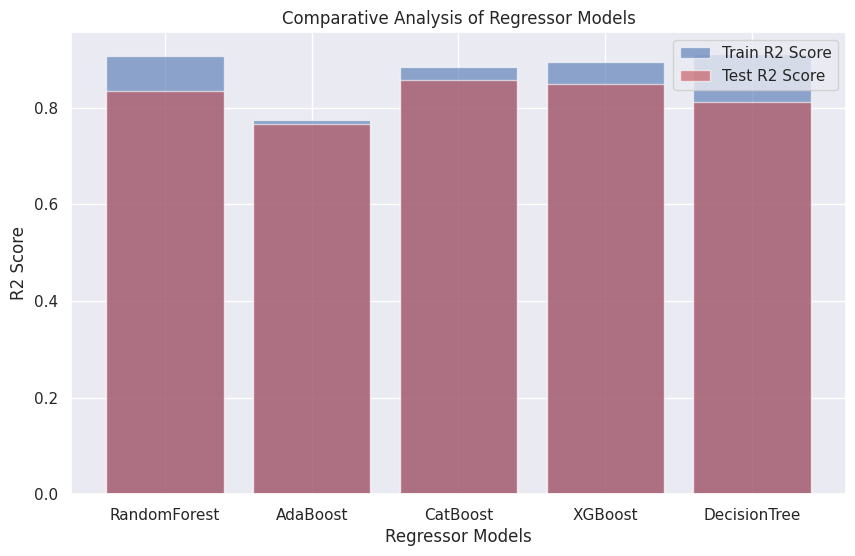

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names
models = ['RandomForest', 'AdaBoost', 'CatBoost', 'XGBoost', 'DecisionTree']

# List of R2 scores on training data
train_r2_scores = [train_r2_rf, train_r2_adaboost, train_r2_catboost, train_r2_xgb, train_r2_dt]

# List of R2 scores on test data
test_r2_scores = [test_r2_rf, test_r2_adaboost, test_r2_catboost, test_r2_xgb, test_r2_dt]

# Create a bar plot for R2 scores on training data
plt.figure(figsize=(10, 6))
plt.bar(models, train_r2_scores, color='b', alpha=0.6, label='Train R2 Score')

# Create a bar plot for R2 scores on test data
plt.bar(models, test_r2_scores, color='r', alpha=0.6, label='Test R2 Score')

# Add labels and title to the plot
plt.xlabel('Regressor Models')
plt.ylabel('R2 Score')
plt.title('Comparative Analysis of Regressor Models')
plt.legend()

# Display the plot
plt.show()

In [48]:
import plotly.graph_objects as go

# List of model names
models = ['RandomForest', 'AdaBoost', 'CatBoost', 'XGBoost', 'DecisionTree']

# List of R2 scores on training data
train_r2_scores = [train_r2_rf, train_r2_adaboost, train_r2_catboost, train_r2_xgb, train_r2_dt]

# List of R2 scores on test data
test_r2_scores = [test_r2_rf, test_r2_adaboost, test_r2_catboost, test_r2_xgb, test_r2_dt]

# Create a figure
fig = go.Figure()

# Add bar traces for R2 scores on training and test data
fig.add_trace(go.Bar(
    x=models,
    y=train_r2_scores,
    name='Train R2 Score',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=models,
    y=test_r2_scores,
    name='Test R2 Score',
    marker_color='red'
))

# Update layout for better visualization
fig.update_layout(
    title='Comparative Analysis of Regressor Models',
    xaxis_title='Regressor Models',
    yaxis_title='R2 Score',
    barmode='group',  # Group bars for training and test R2 scores
    legend=dict(x=0.7, y=0.95),  # Move legend to a better position
    plot_bgcolor='white',  # Set background color
    bargap=0.15,  # Gap between bars
    bargroupgap=0.1,  # Gap between groups of bars
)

# Show the interactive plot
fig.show()


In [49]:
# List of model names
models = ['RandomForest', 'AdaBoost', 'CatBoost', 'XGBoost', 'DecisionTree']

# List of test R2 scores
test_r2_scores = [test_r2_rf, test_r2_adaboost, test_r2_catboost, test_r2_xgb, test_r2_dt]

# Find the index of the model with the highest test R2 score
best_model_index = np.argmax(test_r2_scores)

# Get the name of the best model
best_model_name = models[best_model_index]

# Get the corresponding test R2 score of the best model
best_test_r2_score = test_r2_scores[best_model_index]

# Print the results
print("Best Model: {}".format(best_model_name))
print("Test R2 Score of the Best Model: {:.4f}%".format(best_test_r2_score*100))

Best Model: CatBoost
Test R2 Score of the Best Model: 85.6736%
